## Computer Vision Projects : pose detection and classification 

___

## Outlook

### 1. Detecting poses in a single image - [Link](#1.-Detecting-poses-in-a-single-image)


- [1.1 Getting to know the result ](#1.1-Getting-to-know-the-result)
- [1.2 The whole code at once](#1.2-The-whole-code-at-once)
- [1.3 Defining a function  for the whole code](#1.3-Defining-a-function-for-the-whole-code)


### 2. Classifying poses in a single image - [Link](#2.-Classifying-poses-in-a-single-image)
### 3. Real-time pose detection and classification - [Link](#3.-Real-time-pose-detection-and-classification)


___

In [1]:
import cv2 
import numpy as np
import mediapipe as mp 
import matplotlib.pyplot as plt 
import math
from time import time

In [2]:
print(cv2.__version__)
print(np.__version__)
print(mp.__version__)


4.8.0
1.23.4
0.10.5


___

### 1. Detecting poses in a single image

In [3]:
# initializations

mp_pose = mp.solutions.pose

# note: model_complexity=2 --> leads to dead kernel !! i dunno why ...
pose = mp_pose.Pose(static_image_mode=True, model_complexity=1, min_detection_confidence=0.3)

mp_drawing = mp.solutions.drawing_utils

(645, 500, 3)


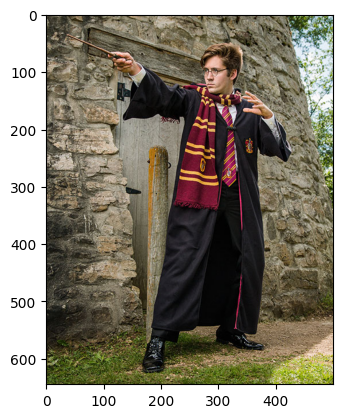

In [4]:
# visualizing the sample image

img = cv2.imread('images/harry-potter-costume-adult.jpg')
print(img.shape)
plt.imshow(img[:,:,::-1]); 

___

#### 1.1 Getting to know the result

In [5]:
# detecting pose
results = pose.process(img[:,:,::-1])
results.pose_landmarks

landmark {
  x: 0.5614777207374573
  y: 0.17122897505760193
  z: -0.4465194344520569
  visibility: 0.9999780654907227
}
landmark {
  x: 0.5827373266220093
  y: 0.15383487939834595
  z: -0.43021661043167114
  visibility: 0.9999550580978394
}
landmark {
  x: 0.5932653546333313
  y: 0.1540198028087616
  z: -0.4301980137825012
  visibility: 0.9999421834945679
}
landmark {
  x: 0.603319525718689
  y: 0.15441524982452393
  z: -0.4301837086677551
  visibility: 0.9999428987503052
}
landmark {
  x: 0.5631433725357056
  y: 0.1529158055782318
  z: -0.40243327617645264
  visibility: 0.9999531507492065
}
landmark {
  x: 0.5587024092674255
  y: 0.1522674560546875
  z: -0.402494341135025
  visibility: 0.9999356269836426
}
landmark {
  x: 0.5549588203430176
  y: 0.15192261338233948
  z: -0.40259864926338196
  visibility: 0.9999405145645142
}
landmark {
  x: 0.6314286589622498
  y: 0.16283497214317322
  z: -0.26928606629371643
  visibility: 0.999880313873291
}
landmark {
  x: 0.5716925263404846
  y: 0.

In [6]:
results.pose_landmarks.landmark

[x: 0.5614777207374573
y: 0.17122897505760193
z: -0.4465194344520569
visibility: 0.9999780654907227
, x: 0.5827373266220093
y: 0.15383487939834595
z: -0.43021661043167114
visibility: 0.9999550580978394
, x: 0.5932653546333313
y: 0.1540198028087616
z: -0.4301980137825012
visibility: 0.9999421834945679
, x: 0.603319525718689
y: 0.15441524982452393
z: -0.4301837086677551
visibility: 0.9999428987503052
, x: 0.5631433725357056
y: 0.1529158055782318
z: -0.40243327617645264
visibility: 0.9999531507492065
, x: 0.5587024092674255
y: 0.1522674560546875
z: -0.402494341135025
visibility: 0.9999356269836426
, x: 0.5549588203430176
y: 0.15192261338233948
z: -0.40259864926338196
visibility: 0.9999405145645142
, x: 0.6314286589622498
y: 0.16283497214317322
z: -0.26928606629371643
visibility: 0.999880313873291
, x: 0.5716925263404846
y: 0.15842905640602112
z: -0.148893341422081
visibility: 0.9999051094055176
, x: 0.5804414749145508
y: 0.19059887528419495
z: -0.3859816789627075
visibility: 0.99996757507

In [7]:
# printing the detected landmarks with their names
if results.pose_landmarks:
    for i in range(32):
        print(mp_pose.PoseLandmark(i).name, "\n", results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value])

NOSE 
 x: 0.5614777207374573
y: 0.17122897505760193
z: -0.4465194344520569
visibility: 0.9999780654907227

LEFT_EYE_INNER 
 x: 0.5827373266220093
y: 0.15383487939834595
z: -0.43021661043167114
visibility: 0.9999550580978394

LEFT_EYE 
 x: 0.5932653546333313
y: 0.1540198028087616
z: -0.4301980137825012
visibility: 0.9999421834945679

LEFT_EYE_OUTER 
 x: 0.603319525718689
y: 0.15441524982452393
z: -0.4301837086677551
visibility: 0.9999428987503052

RIGHT_EYE_INNER 
 x: 0.5631433725357056
y: 0.1529158055782318
z: -0.40243327617645264
visibility: 0.9999531507492065

RIGHT_EYE 
 x: 0.5587024092674255
y: 0.1522674560546875
z: -0.402494341135025
visibility: 0.9999356269836426

RIGHT_EYE_OUTER 
 x: 0.5549588203430176
y: 0.15192261338233948
z: -0.40259864926338196
visibility: 0.9999405145645142

LEFT_EAR 
 x: 0.6314286589622498
y: 0.16283497214317322
z: -0.26928606629371643
visibility: 0.999880313873291

RIGHT_EAR 
 x: 0.5716925263404846
y: 0.15842905640602112
z: -0.148893341422081
visibility: 

In [8]:
# 3d landmarks
results.pose_world_landmarks

landmark {
  x: -0.027931421995162964
  y: -0.6279227137565613
  z: -0.22432781755924225
  visibility: 0.9999780654907227
}
landmark {
  x: -0.011582285165786743
  y: -0.6657931208610535
  z: -0.22001512348651886
  visibility: 0.9999550580978394
}
landmark {
  x: -0.011301584541797638
  y: -0.6661884188652039
  z: -0.21939943730831146
  visibility: 0.9999421834945679
}
landmark {
  x: -0.011517532169818878
  y: -0.6666281819343567
  z: -0.21938462555408478
  visibility: 0.9999428987503052
}
landmark {
  x: -0.040758147835731506
  y: -0.6644202470779419
  z: -0.20581649243831635
  visibility: 0.9999531507492065
}
landmark {
  x: -0.04057740792632103
  y: -0.6653028726577759
  z: -0.20684130489826202
  visibility: 0.9999356269836426
}
landmark {
  x: -0.04083436354994774
  y: -0.6664120554924011
  z: -0.20626327395439148
  visibility: 0.9999405145645142
}
landmark {
  x: 0.0724915862083435
  y: -0.6556900143623352
  z: -0.1460987627506256
  visibility: 0.999880313873291
}
landmark {
  x:

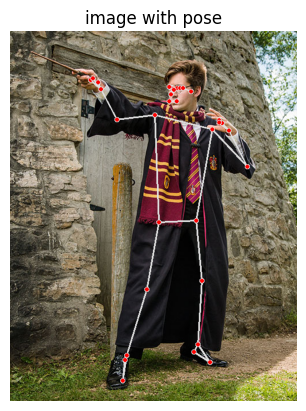

In [9]:
# visualizing image with poses
img2 = img.copy()

if results.pose_landmarks:
    mp_drawing.draw_landmarks(image=img2, landmark_list=results.pose_landmarks, connections=mp_pose.POSE_CONNECTIONS)
    plt.imshow(img2[:,:,::-1]); plt.title('image with pose'); plt.axis('off');

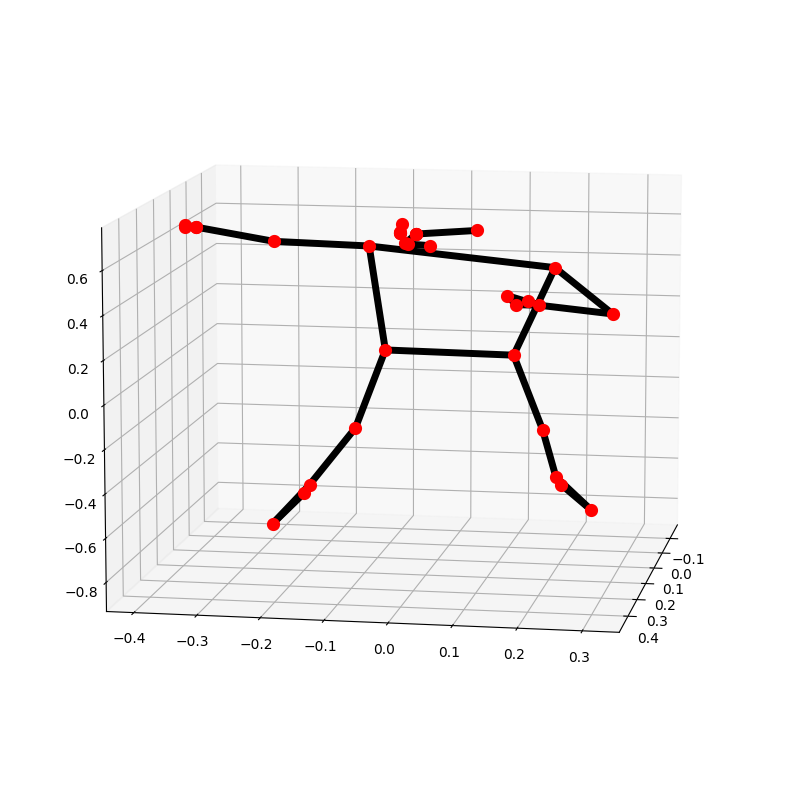

In [10]:
# visualizing the depth
mp_drawing.plot_landmarks(results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)

#### 1.2 The whole code at once

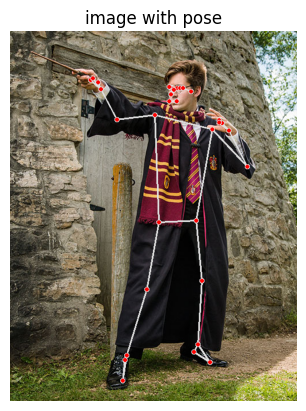

In [11]:
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode=True, model_complexity=1, min_detection_confidence=0.3)
mp_drawing = mp.solutions.drawing_utils

img = cv2.imread('images/harry-potter-costume-adult.jpg')

results = pose.process(img[:,:,::-1])

img2 = img.copy()

if results.pose_landmarks:
    mp_drawing.draw_landmarks(image=img2, landmark_list=results.pose_landmarks, connections=mp_pose.POSE_CONNECTIONS)
    plt.imshow(img2[:,:,::-1]); plt.title('image with pose'); plt.axis('off');

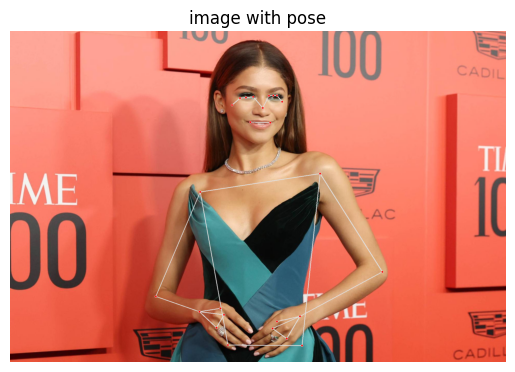

In [12]:
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode=True, model_complexity=1, min_detection_confidence=0.3)
mp_drawing = mp.solutions.drawing_utils

img = cv2.imread('images/zendaya.jpg')

results = pose.process(img[:,:,::-1])

img2 = img.copy()

if results.pose_landmarks:
    mp_drawing.draw_landmarks(image=img2, landmark_list=results.pose_landmarks, connections=mp_pose.POSE_CONNECTIONS)
    plt.imshow(img2[:,:,::-1]); plt.title('image with pose'); plt.axis('off');

In [13]:
# printing the detected landmarks in the image of Zendaya
# note that some of the landmarks ar invisible, so 
# the visibility value is low

if results.pose_landmarks:
    for i in range(32): # as there are total 32 landmarks
        print(mp_pose.PoseLandmark(i).name, "\n", results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value])

NOSE 
 x: 0.5094732046127319
y: 0.23209857940673828
z: -0.6341818571090698
visibility: 0.9999899864196777

LEFT_EYE_INNER 
 x: 0.5219079256057739
y: 0.19531971216201782
z: -0.5889784097671509
visibility: 0.999976634979248

LEFT_EYE 
 x: 0.5308870077133179
y: 0.19496816396713257
z: -0.588992178440094
visibility: 0.9999743700027466

LEFT_EYE_OUTER 
 x: 0.5383461713790894
y: 0.19504815340042114
z: -0.5891805291175842
visibility: 0.9999709129333496

RIGHT_EYE_INNER 
 x: 0.4902377426624298
y: 0.19902265071868896
z: -0.5882512927055359
visibility: 0.9999819993972778

RIGHT_EYE 
 x: 0.4755445420742035
y: 0.20105724036693573
z: -0.5882230997085571
visibility: 0.9999819993972778

RIGHT_EYE_OUTER 
 x: 0.46362271904945374
y: 0.20278410613536835
z: -0.5883637070655823
visibility: 0.999984860420227

LEFT_EAR 
 x: 0.5489335656166077
y: 0.21372711658477783
z: -0.331980437040329
visibility: 0.9999775886535645

RIGHT_EAR 
 x: 0.44740405678749084
y: 0.2234618216753006
z: -0.32939574122428894
visibility:

#### 1.3 Defining a function for the whole code

In [14]:
def detectPose(img, display=True):
    """
    a function to detect pose on an input image.
    it either displays the landmarks on the input image
    or returns the list of scaled detected landmarks and
    the output image.
    (based on the value of display)
    
    required modules: 
        import cv2 
        import numpy as np
        import mediapipe as mp 
        import matplotlib.pyplot as plt
        
    arguments: 
        img:  the input image
        display: a boolean value,
                 if set to True: just display the result, returns nothing
                 if set to false: return the landmarks and the output image
                 the default is True
    returns: 
    
        if display:
            nothing
        else:
            output_image: the input image on which the landmarks are drawn.
            landmarks: a list of detected landmarks(in original scale).
    """

    mp_pose = mp.solutions.pose
    pose = mp_pose.Pose(static_image_mode=True, model_complexity=1, min_detection_confidence=0.3)
    mp_drawing = mp.solutions.drawing_utils

    results = pose.process(img[:,:,::-1])

    height, width, _ = img.shape
    output_image = img.copy()
    landmarks = []
    
    if results.pose_landmarks:
        mp_drawing.draw_landmarks(image=output_image, landmark_list=results.pose_landmarks, connections=mp_pose.POSE_CONNECTIONS)
        
        # if the landmark is visible, append it 
        # if not visible, append a None tuple 
        for landmark in results.pose_landmarks.landmark:
            if landmark.visibility > 0.8:
                landmarks.append((int(landmark.x * width), 
                                  int(landmark.y * height),
                                  int(landmark.z * width)))
            else: 
                # i append a 3-values tuple in case i wanted to make an 
                # x or y vector out of the landmarks using comprehension
                landmarks.append((None, None, None))
                
    if display:
        plt.imshow(output_image[:,:,::-1]); plt.title('image with pose'); plt.axis('off');
    
    else:  
        return landmarks, output_image

#### 1.3.1 Applying on Harry Potter image

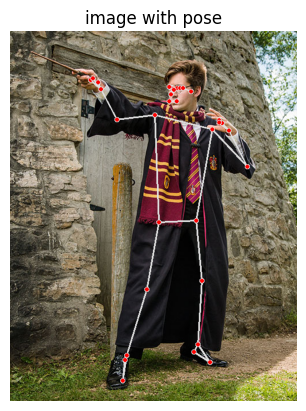

In [15]:
img = cv2.imread('images/harry-potter-costume-adult.jpg')
detectPose(img)

In [16]:
img = cv2.imread('images/harry-potter-costume-adult.jpg')
detectPose(img, False)

([(280, 110, -223),
  (291, 99, -215),
  (296, 99, -215),
  (301, 99, -215),
  (281, 98, -201),
  (279, 98, -201),
  (277, 97, -201),
  (315, 105, -134),
  (285, 102, -74),
  (290, 122, -192),
  (277, 122, -175),
  (352, 171, -78),
  (252, 146, -12),
  (413, 236, -234),
  (186, 154, -23),
  (381, 173, -442),
  (158, 101, -136),
  (369, 160, -484),
  (140, 85, -166),
  (364, 155, -465),
  (144, 82, -177),
  (364, 159, -439),
  (153, 89, -146),
  (324, 330, -2),
  (259, 333, 2),
  (334, 435, 30),
  (238, 450, -11),
  (327, 546, 182),
  (203, 565, 94),
  (320, 559, 193),
  (None, None, None),
  (348, 577, 87),
  (196, 609, -29)],
 array([[[109, 134, 136],
         [ 63,  88,  90],
         [ 35,  60,  62],
         ...,
         [ 65, 100,  73],
         [ 59, 116,  85],
         [ 32, 103,  70]],
 
        [[ 81, 106, 108],
         [ 61,  86,  88],
         [ 55,  78,  80],
         ...,
         [ 93, 109,  86],
         [ 59,  94,  68],
         [ 43,  91,  63]],
 
        [[ 35,  58,

#### 1.3.2 Applying on Zendaya image

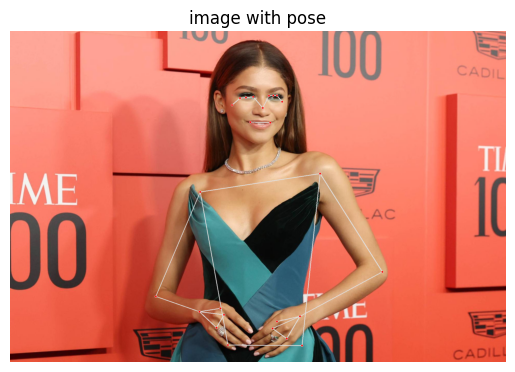

In [17]:
img = cv2.imread('images/zendaya.jpg')
detectPose(img)

In [18]:
img = cv2.imread('images/zendaya.jpg')
detectPose(img, False)

([(978, 297, -1217),
  (1002, 250, -1130),
  (1019, 249, -1130),
  (1033, 249, -1131),
  (941, 254, -1129),
  (913, 257, -1129),
  (890, 259, -1129),
  (1053, 273, -637),
  (859, 286, -632),
  (1007, 354, -1030),
  (930, 352, -1030),
  (1200, 551, -426),
  (736, 622, -182),
  (1441, 931, -432),
  (564, 1026, -258),
  (1122, 1103, -817),
  (733, 1085, -1015),
  (1071, 1189, -970),
  (799, 1147, -1181),
  (1016, 1150, -931),
  (828, 1097, -1189),
  (1033, 1123, -796),
  (814, 1072, -1028),
  (1130, 1216, -108),
  (843, 1214, 111),
  (None, None, None),
  (None, None, None),
  (None, None, None),
  (None, None, None),
  (None, None, None),
  (None, None, None),
  (None, None, None),
  (None, None, None)],
 array([[[154, 168, 255],
         [154, 168, 255],
         [154, 168, 255],
         ...,
         [118, 135, 252],
         [118, 135, 252],
         [117, 134, 251]],
 
        [[153, 167, 255],
         [153, 167, 255],
         [153, 167, 255],
         ...,
         [122, 140, 255

___

### 2. Classifying poses in a single image

#### for simplicity, we start by defining only two poses: sitting and standing  
for checking whether someone is sitting or standing, we calculate the angle  
between the legs and the upper body  
to be specific, between shoulders and knees (the angle at each of hip)   
   
of course this is not the best solution, but for begining it works fine

In [19]:
# defining a function to calculate angles between landmarks

def calcAngle(landmark1, landmark2, landmark3):
    """
    a function to calculate the angle made by three different landmarks.
    
    
    required modules:
        import math
        
    
    arguments:  
        landmark1
        landmark2
        landmark3
        
    returns:
        angle: angle in degrees
        
    """
    
    x1, y1, _ = landmark1
    x2, y2, _ = landmark2
    x3, y3, _ = landmark3
    
    angle = math.degrees(math.atan2(y3-y2, x3-x2) - math.atan2(y1-y2, x1-x2))
    
    if angle < 0:
        angle += 360
        
    return angle

In [20]:
# defining a function to classify the detected pose

def classifyPose(landmarks, output_image, display=True):
    
    """
    a function to classify between two poses, sitting or standing.
    
    required modules: 
        import cv2 
        import numpy as np
        import mediapipe as mp 
        import matplotlib.pyplot as plt
        import math
    
    arguments:
        landmarks: a list of detected landmarks of the person.
        output_image: an image on which the landmarks are drawn.
        display: a boolean value,
                 if set to True: just display the result, 
                 if set to false: return the label
                 the default is True
    returns:
        if display:
            nothing
        else:
            label: the predicted label for the pose
            output_image_with_label: the same output_image with the label
            located on the left corner
    
    """
    
    label = 'unknown pose'
    mp_pose = mp.solutions.pose
    
    if landmarks:
        
        condition = landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER] != (None, None, None) and \
                    landmarks[mp_pose.PoseLandmark.LEFT_HIP] != (None, None, None) and \
                    landmarks[mp_pose.PoseLandmark.LEFT_KNEE] != (None, None, None) and \
                    landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER] != (None, None, None) and \
                    landmarks[mp_pose.PoseLandmark.RIGHT_HIP] != (None, None, None) and \
                    landmarks[mp_pose.PoseLandmark.RIGHT_KNEE] != (None, None, None)



        if condition:
            left_hip_angle = calcAngle(landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER],
                                       landmarks[mp_pose.PoseLandmark.LEFT_HIP],
                                       landmarks[mp_pose.PoseLandmark.LEFT_KNEE])

            right_hip_angle = calcAngle(landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER],
                                        landmarks[mp_pose.PoseLandmark.RIGHT_HIP],
                                        landmarks[mp_pose.PoseLandmark.RIGHT_KNEE])

            if left_hip_angle < 140 or right_hip_angle < 140:
                label = 'sitting'

            elif left_hip_angle  < 185 or right_hip_angle < 185:
                label = 'standing'
            else:
                pass
    
    output_image_with_label = output_image.copy()
    
    ### putting label on the output image
    
    text = label
    font = cv2.FONT_HERSHEY_SIMPLEX
    fontScale = 1
    color = (255, 255, 255)
    thickness = 2
    lineType = cv2.LINE_AA

    # Get the size of the text string
    textSize, _ = cv2.getTextSize(text, font, fontScale, thickness)

    # Draw the filled rectangle behind the text
    cv2.rectangle(output_image_with_label, (10, 10), (textSize[0] + 25, textSize[1] + 25), (0, 0, 0), cv2.FILLED)
    cv2.rectangle(output_image_with_label, (10, 10), (textSize[0] + 25, textSize[1] + 25), (250, 250, 250), 2)
    

    # Draw the text string on the image
    cv2.putText(output_image_with_label, text, (20,37), font, fontScale, color, thickness, lineType)
    

    if display:
        plt.imshow(output_image_with_label[:,:,::-1]); plt.title('image with pose');
        
    else:
        return label, output_image_with_label

In [21]:
# note that text size is (134, 22)

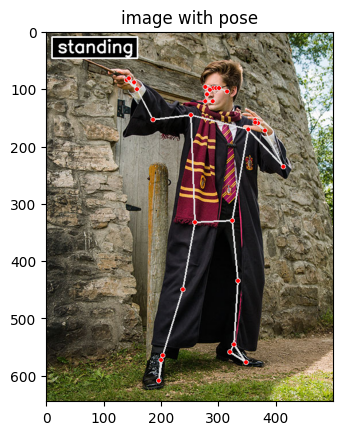

In [22]:
img = cv2.imread('images/harry-potter-costume-adult.jpg')
landmarks, output_image = detectPose(img, False)
classifyPose(landmarks, output_image)

In [23]:
img = cv2.imread('images/harry-potter-costume-adult.jpg')
landmarks, output_image = detectPose(img, False)
classifyPose(landmarks, output_image, False)[0]

'standing'

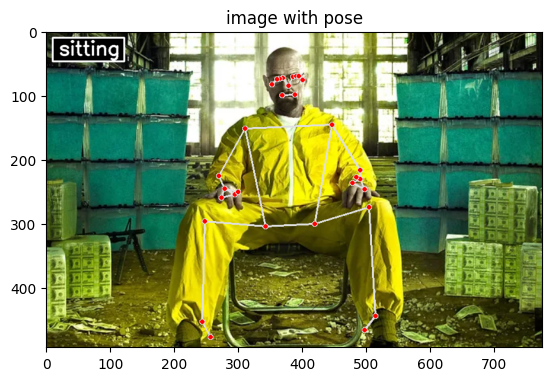

In [24]:
img = cv2.imread('images/white.png')
landmarks, output_image = detectPose(img, False)
classifyPose(landmarks, output_image)

In [25]:
img = cv2.imread('images/white.png')
landmarks, output_image = detectPose(img, False)
classifyPose(landmarks, output_image, False)[0]

'sitting'

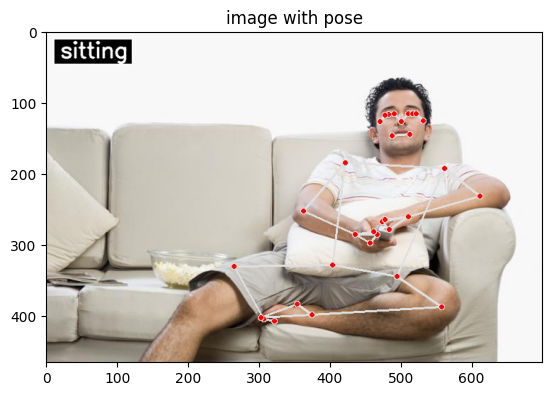

In [26]:
img = cv2.imread('images/a-man-sitting-on-a-sofa-watching-tv.jpg')
landmarks, output_image = detectPose(img, False)
classifyPose(landmarks, output_image)

In [27]:
img = cv2.imread('images/a-man-sitting-on-a-sofa-watching-tv.jpg')
landmarks, output_image = detectPose(img, False)
classifyPose(landmarks, output_image, False)[0]

'sitting'

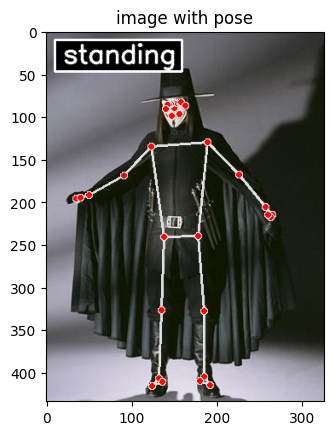

In [28]:
img = cv2.imread('images/v.jpg')
landmarks, output_image = detectPose(img, False)
classifyPose(landmarks, output_image)

In [29]:
img = cv2.imread('images/v.jpg')
landmarks, output_image = detectPose(img, False)
classifyPose(landmarks, output_image, False)[0]

'standing'

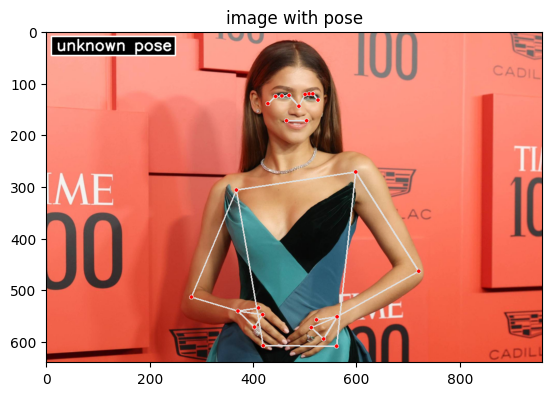

In [30]:
img = cv2.imread('images/zendaya.jpg')
img = cv2.resize(img, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)
landmarks, output_image = detectPose(img, False)
classifyPose(landmarks, output_image)

In [31]:
img = cv2.imread('images/zendaya.jpg')
img = cv2.resize(img, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)
landmarks, output_image = detectPose(img, False)
classifyPose(landmarks, output_image, False)[0]

'unknown pose'

In [32]:
landmarks

[(489, 145, -600),
 (501, 122, -557),
 (509, 121, -557),
 (516, 121, -557),
 (470, 124, -556),
 (456, 125, -556),
 (444, 126, -557),
 (526, 133, -311),
 (429, 140, -311),
 (504, 173, -507),
 (465, 173, -508),
 (599, 272, -206),
 (368, 307, -88),
 (721, 464, -208),
 (281, 514, -124),
 (563, 552, -396),
 (371, 541, -492),
 (537, 595, -469),
 (403, 572, -572),
 (513, 573, -450),
 (419, 548, -574),
 (523, 558, -385),
 (411, 535, -497),
 (562, 609, -58),
 (420, 608, 59),
 (None, None, None),
 (None, None, None),
 (None, None, None),
 (None, None, None),
 (None, None, None),
 (None, None, None),
 (None, None, None),
 (None, None, None)]

### 3. Real-time pose detection and classification

#### 3.1 Again defining the functions in a rather different way

In [3]:
import cv2 
import numpy as np
import mediapipe as mp 
import matplotlib.pyplot as plt 
import math

In [4]:
def detectPose(img, display=True):
    """
    a function to detect pose on an inpute image.
    it either displays the landmarks on the input image
    or returns the list of scaled detected landmarks and
    the output image.
    (based on the value of display)
    
    required modules: 
        import cv2 
        import numpy as np
        import mediapipe as mp 
        import matplotlib.pyplot as plt
        
    arguments: 
        img:  the inpute image
        display: a boolean value,
                 if set to True: just display the result, returns nothing
                 if set to false: return the output image and the landmarks
                 the default is True
    returns: 
    
        if display:
            nothing
        else:
            output_image: the input image on which the landmarks are drawn.
            landmarks: a list of detected landmarks(in original scale).
    """

    mp_pose = mp.solutions.pose
    pose = mp_pose.Pose(static_image_mode=False, model_complexity=1, min_detection_confidence=0.3)
    mp_drawing = mp.solutions.drawing_utils

    results = pose.process(img[:,:,::-1])

    height, width, _ = img.shape
    output_image = img.copy()
    landmarks = []
    
    if results.pose_landmarks:
        mp_drawing.draw_landmarks(image=output_image, landmark_list=results.pose_landmarks, connections=mp_pose.POSE_CONNECTIONS)
        
        # if the landmark is visible, append it 
        # if not visible, append a None tuple 
        for landmark in results.pose_landmarks.landmark:
            if landmark.visibility > 0.8:
                landmarks.append((int(landmark.x * width), 
                                  int(landmark.y * height),
                                  int(landmark.z * width)))
            else: 
                # i append a 3-values tuple in case i wanted to make an 
                # x or y vector out of the landmarks using comprehension
                landmarks.append((None, None, None))
                
    if display:
        plt.imshow(output_image[:,:,::-1]); plt.title('image with pose'); plt.axis('off');
    
    else:  
        return landmarks, output_image

In [5]:
# defining a function to calculate angles between landmarks

def calcAngle(landmark1, landmark2, landmark3):
    """
    a function to calculate angle between three different landmarks.
    
    required modules:
        import math
        
    
    arguments:  
        landmark1
        landmark2
        landmark3
        
    returns:
        angle: angle in degrees
        
    """
    
    x1, y1, _ = landmark1
    x2, y2, _ = landmark2
    x3, y3, _ = landmark3
    
    angle = math.degrees(math.atan2(y3-y2, x3-x2) - math.atan2(y1-y2, x1-x2))
    
    if angle < 0:
        angle += 360
        
    return angle

In [6]:
# defining a function to classify the detected pose

def classifyPose(landmarks, output_image, display=True):
    
    """
    a function to classify between two poses, sitting and standing.
    
    required modules: 
        import cv2 
        import numpy as np
        import mediapipe as mp 
        import matplotlib.pyplot as plt
        import math
    
    arguments:
        landmarks: a list of detected landmarks of the person.
        output_image: an image on which the landmarks are drawn.
        display: a boolean value,
                 if set to True: just display the result, 
                 if set to false: return the label
                 the default is True
    returns:
        if display:
            nothing
        else:
            label: the predicted label for the pose
            output_image_with_label: the same output_image with the label
            located on the left corner
    
    """
    
    label = 'unknown pose'
    mp_pose = mp.solutions.pose
    
    if landmarks:
        
        condition = landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER] != (None, None, None) and \
                    landmarks[mp_pose.PoseLandmark.LEFT_HIP] != (None, None, None) and \
                    landmarks[mp_pose.PoseLandmark.LEFT_KNEE] != (None, None, None) and \
                    landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER] != (None, None, None) and \
                    landmarks[mp_pose.PoseLandmark.RIGHT_HIP] != (None, None, None) and \
                    landmarks[mp_pose.PoseLandmark.RIGHT_KNEE] != (None, None, None)



        if condition:
            left_hip_angle = calcAngle(landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER],
                                       landmarks[mp_pose.PoseLandmark.LEFT_HIP],
                                       landmarks[mp_pose.PoseLandmark.LEFT_KNEE])

            right_hip_angle = calcAngle(landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER],
                                        landmarks[mp_pose.PoseLandmark.RIGHT_HIP],
                                        landmarks[mp_pose.PoseLandmark.RIGHT_KNEE])

            if left_hip_angle < 140 or right_hip_angle < 140:
                label = 'sitting'

            elif left_hip_angle  < 185 or right_hip_angle < 185:
                label = 'standing'
            else:
                pass
    
    output_image_with_label = output_image.copy()
    
    ### putting label on the output image
    
    text = label
    font = cv2.FONT_HERSHEY_SIMPLEX
    fontScale = 1
    color = (255, 255, 255)
    thickness = 2
    lineType = cv2.LINE_AA

    # Get the size of the text string
    textSize, _ = cv2.getTextSize(text, font, fontScale, thickness)

    # Draw the filled rectangle behind the text
    cv2.rectangle(output_image_with_label, (10, 10), (textSize[0] + 25, textSize[1] + 25), (0, 0, 0), cv2.FILLED)
    cv2.rectangle(output_image_with_label, (10, 10), (textSize[0] + 25, textSize[1] + 25), (250, 250, 250), 2)
    

    # Draw the text string on the image
    cv2.putText(output_image_with_label, text, (20,37), font, fontScale, color, thickness, lineType)
    

    if display:
        plt.imshow(output_image_with_label[:,:,::-1]); plt.title('image with pose');
        
    else:
        return label, output_image_with_label

#### 3.2 Reading from webcam and detecting the pose

In [36]:
cap = cv2.VideoCapture(0)

while True:
    ret, frame =  cap.read()
    if not ret:
        break
        
    frame = cv2.flip(frame,1)
        
    
    landmarks, output_image = detectPose(frame, False)
    frame_with_label = classifyPose(landmarks, output_image, False)[1]
    
    cv2.imshow('frame with label', frame_with_label)
    
    key = cv2.waitKey(1)
    if key == ord("q"):
        break

cap.release()
cv2.destroyAllWindows()

#### 3.2 Reading from a short video and detecting the pose

In [7]:
cap = cv2.VideoCapture("Smith-Machine-Front-Squat_cropped_fps_8.mp4")

while True:
    ret, frame =  cap.read()
    if not ret:
        break
        
    
    landmarks, output_image = detectPose(frame, False)
    frame_with_label = classifyPose(landmarks, output_image, False)[1]
    
    cv2.imshow('frame with label', frame_with_label)
    
    key = cv2.waitKey(1)
    if key == ord("q"):
        break

cap.release()
cv2.destroyAllWindows()

optimization next time.